In [9]:
import networkx as nx
import pandas as pd

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import plotly.offline as py
from plotly.graph_objs import *

In [2]:
# Read in game board
edge_lists_df = pd.read_csv("Scotland_Yard_Board_List_Format.csv", sep=';')

# Clean up empty cells
edge_lists_df.replace('--', '-1', inplace=True)

# Split each column of from a comma separated to a list
edge_lists_df["Taxi"] = edge_lists_df["Taxi"].str.split(',')
edge_lists_df["Bus"] = edge_lists_df["Bus"].str.split(',')
edge_lists_df["Subway"] = edge_lists_df["Subway"].str.split(',')
edge_lists_df["Boat"] = edge_lists_df["Boat"].str.split(',')

edge_lists_df.head()

,Vertex,Taxi,Bus,Subway,Boat
0,1,"[8, 9]","[58, 46]",[46],[-1]
1,2,"[10, 20]",[-1],[-1],[-1]
2,3,"[4, 11, 12]","[22, 23]",[-1],[-1]
3,4,"[3, 13]",[-1],[-1],[-1]
4,5,"[15, 16]",[-1],[-1],[-1]


In [3]:
# Convert from df columns to dictionaries
taxi_edges = pd.Series(edge_lists_df["Taxi"].values, index=edge_lists_df.Vertex)
taxi_edges = taxi_edges.to_dict()

bus_edges = pd.Series(edge_lists_df["Bus"].values, index=edge_lists_df.Vertex)
bus_edges = bus_edges.to_dict()

subway_edges = pd.Series(edge_lists_df["Subway"].values, index=edge_lists_df.Vertex)
subway_edges = subway_edges.to_dict()

boat_edges = pd.Series(edge_lists_df["Boat"].values, index=edge_lists_df.Vertex)
boat_edges = boat_edges.to_dict()

# Print out a few entries of taxi_edges, to demo the format
print("taxi_edges[1] = ", taxi_edges[1])
print("taxi_edges[2] = ", taxi_edges[2])
print("taxi_edges[3] = ", taxi_edges[3])

taxi_edges[1] =  ['8', ' 9']
taxi_edges[2] =  ['10', ' 20']
taxi_edges[3] =  ['4', ' 11', ' 12']


In [4]:
# Create Taxi Graph
taxi_graph = nx.Graph()

taxi_graph.add_nodes_from(taxi_edges.keys())
for vertex, edges in taxi_edges.items():
    for neighbor in edges:
        taxi_graph.add_edge(vertex, int(neighbor))

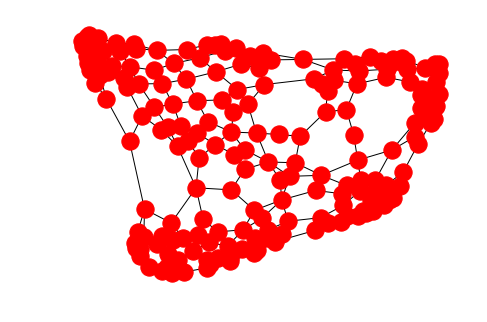

In [5]:
# Draw graph
nx.draw_spectral(taxi_graph)



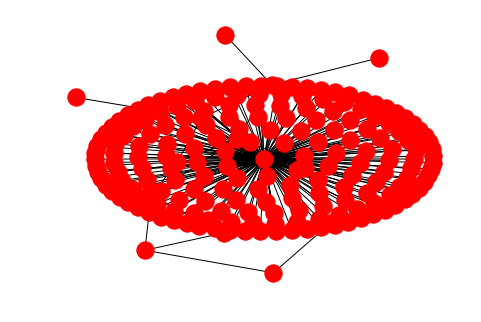

In [8]:
# Create Subway Graph
subway_graph = nx.Graph()

subway_graph.add_nodes_from(subway_edges.keys())
for vertex, edges in subway_edges.items():
    for neighbor in edges:
        subway_graph.add_edge(vertex, int(neighbor))
        
# Draw graph
nx.draw_kamada_kawai(subway_graph)

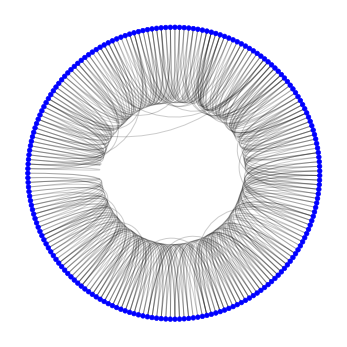

In [11]:
import nxviz as nv
c = nv.plots.CircosPlot(taxi_graph)
c.draw()
plt.show()

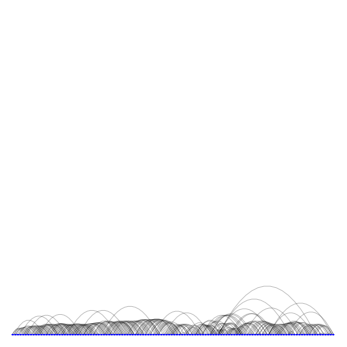

In [12]:
a = nv.plots.ArcPlot(taxi_graph)
a.draw()
plt.show()

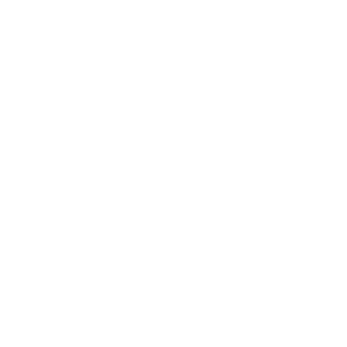

In [13]:
b = nv.plots.BasePlot(taxi_graph)
b.draw()
plt.show()